## Create a Graph

In [1]:
class Graph:
    def __init__(self, node_list):
        self.node_list = node_list
    
    def add_node(self, node):
        self.node_list.append(node)

class Node:
    def __init__(self, neighbors, data):
        self.neighbors = neighbors
        self.data = data
    
    def add_neighbor(self, node):
        self.neighbors.append(node)

In [2]:
node1 = Node([],1)
node2 = Node([],2)
node3 = Node([],3)
node4 = Node([],4)
node5 = Node([],5)
node6 = Node([],6)
node7 = Node([],7)
node8 = Node([],8)

node1.neighbors = [node2, node3]
node2.neighbors = [node4]
node3.neighbors = [node4, node5, node6]
node4.neighbors = [node6]
node5.neighbors = [node6]
node7.neighbors = [node8]

graph = Graph([node1, node2, node3, node4, node5, node6, node7, node8])

## Depth First Search

### Given a graph and a target number T, find T exists in the graph

In [3]:
def dfs(graph, target):
    state = {}
    for node in graph.node_list:
        if node not in state and dfs_visit(node, target, state):
            return True
    return False

def dfs_visit(node, target, state):
    state[node] = 'visiting'
    if node.data == target:
        return True
    
    for neighbor in node.neighbors:
        if neighbor not in state and dfs_visit(neighbor, target, state):
            return True
    state[node] = 'visited'
    return False

dfs(graph, 5)

True

### Keys and Rooms
There are N rooms and you start in room 0.  Each room has a distinct number in 0, 1, 2, ..., N-1, and each room may have some keys to access the next room. 

Formally, each room i has a list of keys rooms[i], and each key rooms[i][j] is an integer in [0, 1, ..., N-1] where N = rooms.length.  A key rooms[i][j] = v opens the room with number v.

Initially, all the rooms start locked (except for room 0). 

You can walk back and forth between rooms freely.

Return true if and only if you can enter every room.

In [3]:
class Solution:
    def canVisitAllRooms(self, rooms) -> bool:
        visited = set()
        self.dfs(0, rooms, visited)
        return len(visited) == len(rooms)
    
    def dfs(self, room_no, rooms, visited):
        visited.add(room_no)
        for key in rooms[room_no]:
            if key not in visited:
                self.dfs(key, rooms, visited)
                
obj = Solution()
rooms = [[1],[2],[3],[]]
# rooms = [[1,3],[3,0,1],[2],[0]]
obj.canVisitAllRooms(rooms)

True

### Clone a Graph

In [4]:
def clone_graph(node):
    visited = {}
    return dfs(node, visited)

def dfs(node, visited):
    if node in visited:
        return visited[node]
    
    clone_node = Node([], node.data)
    visited[node] = clone_node
    for neighbor in node.neighbors:
        clone_node.neighbors.append(dfs(neighbor, visited))
    return clone_node

clone_graph(node1)

## Breadth First Search

### Given a graph and a target number T, find T exists in the graph

In [5]:
def bfs(graph, target):
    state = {}
    for node in graph.node_list:
        if node not in state and bfs_visit(node, state, target):
            return True
    return False

def bfs_visit(node, state, target):
    queue = []
    queue.append(node)
    state[node] = 'visiting'
    
    while len(queue):
        node = queue.pop(0)
        if node.data == target:
            return True
        for neighbor in node.neighbors:
            if neighbor not in state:
                queue.append(neighbor)
                state[neighbor] = 'visiting'
        state[node] = 'visited'
    return False
bfs(graph, 6)      

True

### Jump Game II
Given an array of non-negative integers, you are initially positioned at the first index of the array.

Each element in the array represents your maximum jump length at that position.

Your goal is to reach the last index in the minimum number of jumps.

In [5]:
def jump(nums):
    visited = {0}; level = 0; queue = [0]

    while len(queue):
        size = len(queue)
        for i in range(size):
            index = queue.pop(0)
            if index == len(nums)-1:
                return level
            neighbors = [index + val for val in range(nums[index], 0, -1)]
            for neigh in neighbors:
                if 0<=neigh<len(nums) and neigh not in visited:
                    if neigh == len(nums)-1: return level + 1
                    queue.append(neigh)
                    visited.add(neigh)
        level += 1

jump([2,3,1,1,4])

2

### Jump game III
Given an array of non-negative integers arr, you are initially positioned at start index of the array. When you are at index i, you can jump to i + arr[i] or i - arr[i], check if you can reach to any index with value 0.

Notice that you can not jump outside of the array at any time.

In [9]:
 def canReach(arr, start: int) -> bool:
    queue = [start]; visited = set()
    while queue:
        index = queue.pop(0)
        if arr[index] == 0:
            return True
        for new_index in [index+arr[index], index-arr[index]]:
            if 0<=new_index<len(arr) and new_index not in visited:
                if arr[index] == 0: return True
                queue.append(new_index)
                visited.add(new_index)
    return False

arr = [4,2,3,0,3,1,2]; start = 5
canReach(arr, start)

True

### Jump Game IV
Given an array of integers arr, you are initially positioned at the first index of the array.

In one step you can jump from index i to index:

* i + 1 where: i + 1 < arr.length.
* i - 1 where: i - 1 >= 0.
* j where: arr[i] == arr[j] and i != j.
Return the minimum number of steps to reach the last index of the array.

Notice that you can not jump outside of the array at any time.

In [11]:
def minJumps(arr):
    import collections
    hm = collections.defaultdict(list)
    for i, val in enumerate(arr):
        hm[val].append(i)

    queue = [0]; seen = {0}; jumps = 0
    while queue:
        size = len(queue)
        for _ in range(size):
            index = queue.pop(0)
            if index == len(arr)-1:
                return jumps
            for i in [index+1, index-1] + hm[arr[index]][::-1]:
                if 0<=i<len(arr) and i not in seen:
                    if i == len(arr)-1: return jumps + 1
                    seen.add(i)
                    queue.append(i)
        jumps += 1

minJumps([100,-23,-23,404,100,23,23,23,3,404])

3

### Frog Jump
A frog is crossing a river. The river is divided into x units and at each unit there may or may not exist a stone. The frog can jump on a stone, but it must not jump into the water.

Given a list of stones' positions (in units) in sorted ascending order, determine if the frog is able to cross the river by landing on the last stone. Initially, the frog is on the first stone and assume the first jump must be 1 unit.

If the frog's last jump was k units, then its next jump must be either k - 1, k, or k + 1 units. Note that the frog can only jump in the forward direction.

Note:

The number of stones is ≥ 2 and is < 1,100.
Each stone's position will be a non-negative integer < 231.
The first stone's position is always 0.
Example 1:

[0,1,3,5,6,8,12,17]


Return true. The frog can jump to the last stone by jumping 
1 unit to the 2nd stone, then 2 units to the 3rd stone, then 
2 units to the 4th stone, then 3 units to the 6th stone, 
4 units to the 7th stone, and 5 units to the 8th stone.

**Note: can also be solved using DFS + Memo**

In [9]:
def canCross(stones):
    target = stones[-1]
    stones = set(stones)
    if 1 not in stones: return False
    visited = {(1,1)}; queue = [(1,1)]
    while queue:
        pos, jump = queue.pop(0)
        if pos == target: return True
        for next_jump in [jump-1, jump, jump+1]:
            next_pos = pos + next_jump
            if next_pos > pos and next_pos in stones and (next_pos, next_jump) not in visited:
                if next_pos == target: return True
                visited.add((next_pos, next_jump))
                queue.append((next_pos, next_jump))
    return False

canCross([0,1,3,5,6,8,12,17])

True

### Word Ladder 
https://leetcode.com/problems/word-ladder/

In [9]:
def ladderLength(beginWord, endWord, wordList):
    import string
    queue = [beginWord]; wordList = set(wordList); distance = 0

    while len(queue):
        size = len(queue)
        distance += 1
        for _ in range(size):
            word = queue.pop(0)
            if word == endWord:
                return distance
            for i in range(len(word)):
                for c in string.ascii_lowercase:
                    cand = word[:i] + c + word[i+1:]
                    if cand in wordList:
                        queue.append(cand)
                        wordList.remove(cand)
    return 0

beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]
ladderLength(beginWord, endWord, wordList)    

5

### Shortest Path in a Grid with Obstacles Elimination
Given a m * n grid, where each cell is either 0 (empty) or 1 (obstacle). In one step, you can move up, down, left or right from and to an empty cell.

Return the minimum number of steps to walk from the upper left corner (0, 0) to the lower right corner (m-1, n-1) given that you can eliminate at most k obstacles. If it is not possible to find such walk return -1.

 

Example 1:

Input: 
grid = 
[[0,0,0],
 [1,1,0],
 [0,0,0],
 [0,1,1],
 [0,0,0]], 
k = 1
* Output: 6
* Explanation: 
* The shortest path without eliminating any obstacle is 10. 
* The shortest path with one obstacle elimination at position (3,2) is 6. Such path is (0,0) -> (0,1) -> (0,2) -> (1,2) -> (2,2) -> (3,2) -> (4,2).

In [9]:
def shortestPath(grid, k: int) -> int:
    queue = [(0, 0, k, 0)]; visited = {(0, 0, k)}
    while queue:
        row, col, k, steps = queue.pop(0)
        if row == len(grid)-1 and col == len(grid[0])-1:
            return steps
        for x, y in [(row+1, col), (row-1, col), (row, col+1), (row, col-1)]:
            if 0<=x<len(grid) and 0<=y<len(grid[0]):
                if grid[x][y] == 1 and k>0 and (x, y, k-1) not in visited:
                    queue.append((x, y, k-1, steps+1))
                    visited.add((x, y, k-1))
                elif grid[x][y] == 0 and (x, y, k) not in visited:
                    queue.append((x, y, k, steps+1))
                    visited.add((x, y, k))
    return -1

grid = [[0,0,0], [1,1,0], [0,0,0], [0,1,1], [0,0,0]]; k = 1
shortestPath(grid, k)

6

### Open the Lock
You have a lock in front of you with 4 circular wheels. Each wheel has 10 slots: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'. The wheels can rotate freely and wrap around: for example we can turn '9' to be '0', or '0' to be '9'. Each move consists of turning one wheel one slot.

The lock initially starts at '0000', a string representing the state of the 4 wheels.

You are given a list of deadends dead ends, meaning if the lock displays any of these codes, the wheels of the lock will stop turning and you will be unable to open it.

Given a target representing the value of the wheels that will unlock the lock, return the minimum total number of turns required to open the lock, or -1 if it is impossible.

Example 1:
* Input: deadends = ["0201","0101","0102","1212","2002"], target = "0202"
* Output: 6
* Explanation:
A sequence of valid moves would be "0000" -> "1000" -> "1100" -> "1200" -> "1201" -> "1202" -> "0202".
Note that a sequence like "0000" -> "0001" -> "0002" -> "0102" -> "0202" would be invalid,
because the wheels of the lock become stuck after the display becomes the dead end "0102".

In [11]:
def openLock(deadends, target: str) -> int:
    deadends = set(deadends)
    visited = set()
    queue = ['0000']
    level = 0
    while queue:
        size = len(queue)
        for _ in range(size):
            string = queue.pop(0)
            if string in deadends:
                continue
            if string == target:
                return level
            for i in range(4):
                digit = int(string[i])
                for moves in [-1, 1]:
                    new_digit = (digit + moves) % 10
                    new_string = string[:i] + str(new_digit) + string[i+1:]
                    if new_string not in visited:
                        visited.add(new_string)
                        queue.append(new_string)
        level += 1
    return -1    

deadends = ["0201","0101","0102","1212","2002"]; target = "0202"
openLock(deadends, target)

6

### Find the City With the Smallest Number of Neighbors at a Threshold Distance
There are n cities numbered from 0 to n-1. Given the array edges where edges[i] = [fromi, toi, weighti] represents a bidirectional and weighted edge between cities fromi and toi, and given the integer distanceThreshold.

Return the city with the smallest number of cities that are reachable through some path and whose distance is at most distanceThreshold, If there are multiple such cities, return the city with the greatest number.

Notice that the distance of a path connecting cities i and j is equal to the sum of the edges' weights along that path.

In [9]:
from heapq import heappush, heappop
import collections
class Solution:
    def findTheCity(self, n: int, edges, distanceThreshold: int) -> int:
        graph = collections.defaultdict(dict)
        ans = None; min_count = float('inf')
        for x, y, cost in edges:
            graph[x][y] = cost
            graph[y][x] = cost
        for node in range(n):
            count = self.dijkstra(node, graph, distanceThreshold)
            if count < min_count:
                ans = node
                min_count = count
            elif count == min_count:
                ans = max(ans, node)
        return ans
    
    def dijkstra(self, node, graph, threshold):
        heap = []; count = 0; visited = set()
        heappush(heap, (0, node))
        while heap:
            dist, node = heappop(heap)
            if node in visited: continue
            if dist <= threshold:
                count += 1
            else:
                return count
            visited.add(node)
            for neigh in graph[node]:
                heappush(heap, (dist+graph[node][neigh], neigh))
        return count
    
obj = Solution()
obj.findTheCity(n = 4, edges = [[0,1,3],[1,2,1],[1,3,4],[2,3,1]], distanceThreshold = 4)

3

### Cheapest Flights With K Stops
There are n cities connected by m flights. Each fight starts from city u and arrives at v with a price w.

Now given all the cities and flights, together with starting city src and the destination dst, your task is to find the cheapest price from src to dst with up to k stops. If there is no such route, output -1.

In [14]:
def findCheapestPrice(n, flights, src, dst, K):
    import collections
    from heapq import heappush, heappop
    graph = collections.defaultdict(dict)
    for x, y, cost in flights:
        graph[x][y] = cost
    queue = [(0, src, 0)]; visited = set()
    while queue:
        cost_so_far, node, stops = heappop(queue)
        if stops>K+1 or (node, stops) in visited:
            continue
        if node == dst:
            return cost_so_far
        visited.add((node, stops))
        for neigh in graph[node]:
            if (neigh, stops + 1) not in visited:
                new_cost = cost_so_far + graph[node][neigh]
                heappush(queue, (new_cost, neigh, stops+1))
    return -1

n = 4; flights = [[0,1,1],[0,2,5],[1,2,1],[2,3,1]]; src = 0; dst = 3; K = 1
findCheapestPrice(n, flights, src, dst, K)

6

### Network Delay Time
There are N network nodes, labelled 1 to N.

Given times, a list of travel times as directed edges times[i] = (u, v, w), where u is the source node, v is the target node, and w is the time it takes for a signal to travel from source to target.

Now, we send a signal from a certain node K. How long will it take for all nodes to receive the signal? If it is impossible, return -1.

In [19]:
from heapq import heappush, heappop
from collections import defaultdict
def networkDelayTime(times, N, K) -> int:
    graph = defaultdict(dict)
    for x, y, time in times:
        graph[x][y] = time
    heap = [(0, K)]; ans = 0; visited = set(); 
    while heap:
        time, node = heappop(heap)
        if node in visited:
            continue
        N -= 1
        ans = time
        visited.add(node)
        for neigh, t in graph[node].items():
            if neigh not in visited:
                heappush(heap, (time+t, neigh))
    return ans if N == 0 else -1

times = [[2,1,1],[2,3,1],[3,4,1]]; N = 4; K = 2
networkDelayTime(times, N, K)

2

### Path With Maximum Minimum Value
Given a matrix of integers A with R rows and C columns, find the maximum score of a path starting at [0,0] and ending at [R-1,C-1].

The score of a path is the minimum value in that path.  For example, the value of the path 8 →  4 →  5 →  9 is 4.

A path moves some number of times from one visited cell to any neighbouring unvisited cell in one of the 4 cardinal directions (north, east, west, south).
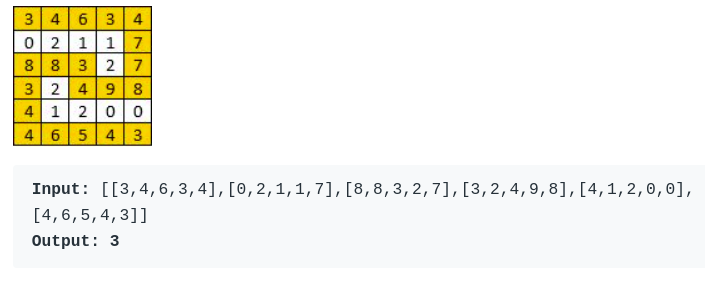

In [10]:
from heapq import heappush, heappop
def maximumMinimumPath(A) -> int:
    heap = [(-A[0][0], 0, 0)]; ans = A[0][0]; seen = {0,0}
    while heap:
        val, i, j = heappop(heap)
        ans = min(ans, -val)
        if i == len(A)-1 and j == len(A[0])-1:
            return ans
        for x, y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
            if 0<=x<len(A) and 0<=y<len(A[0]) and (x,y) not in seen:
                heappush(heap, (-A[x][y], x, y))
                seen.add((x, y))

maximumMinimumPath([[3,4,6,3,4],[0,2,1,1,7],[8,8,3,2,7],[3,2,4,9,8],[4,1,2,0,0],[4,6,5,4,3]])

3

### Word Ladder II
https://leetcode.com/problems/word-ladder-ii/

In [14]:
def findLadders(beginWord, endWord, wordList):
    from collections import defaultdict
    dict_ = set(wordList); level = {}; neighbors = defaultdict(list); solution = [beginWord]; result = []

    bfs(beginWord, endWord, dict_, level, neighbors)
    dfs(endWord, level, neighbors, solution, result)
    return result

def bfs(start, end, dict_, level, neighbors):
    queue = []
    queue.append(start)
    level[start] = 0

    while len(queue):
        found = False
        size = len(queue)
        for i in range(size):
            curr = queue.pop(0)
            neighbors[curr] = get_neighbors(curr, dict_)
            for neigh in neighbors[curr]:
                if neigh not in level:
                    level[neigh] = level[curr]+1
                    if neigh == end:
                        found = True
                    else:
                        queue.append(neigh)
        if found:
            return

def dfs(end, level, neighbors, solution, result):
    if solution[-1] == end:
        result.append(solution[:])
        return
    
    curr = solution[-1]
    for neigh in neighbors[curr]:
        if level[neigh] == level[curr]+1:
            solution.append(neigh)
            dfs(end, level, neighbors, solution, result)
            solution.pop()

def get_neighbors(curr, dict_):
    import string
    neighs = []
    for i in range(len(curr)):
        for c in string.ascii_lowercase:
            cand = curr[:i] + c + curr[i+1:]
            if cand != curr and cand in dict_:
                neighs.append(cand)
    return neighs

In [15]:
beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]
findLadders(beginWord, endWord, wordList)

[['hit', 'hot', 'dot', 'dog', 'cog'], ['hit', 'hot', 'lot', 'log', 'cog']]

## Topological sorting

In [9]:
node1 = Node([],1)
node2 = Node([],2)
node3 = Node([],3)
node4 = Node([],4)
node5 = Node([],5)

node1.neighbors = [node2, node4]
node2.neighbors = [node3, node4, node5]
node3.neighbors = [node5]

graph = Graph([node1, node2, node3, node4, node5])

### Sort a graph in Topological order

In [10]:
def topo_sort(graph):
    state = {}
    stack = []
    for node in graph.node_list:
        if node not in state:
            dfs_visit(node,state, stack)
    return stack

def dfs_visit(node, state, stack):
    state[node] = 'visiting'
    for neighbor in node.neighbors:
        if neighbor not in state:
            dfs_visit(neighbor, state, stack)
    state[node] = 'visited'
    stack.append(node)
stack = topo_sort(graph)
while len(stack):
    print(stack.pop().data)

1
2
4
3
5


### Minimum number of semester required to complete courses

In [12]:
def min_semesters(graph):
    from collections import defaultdict
    stack = topo_sort(graph)
    sem = defaultdict(lambda: 1)
    min_sem = float('-inf')
    while len(stack):
        node = stack.pop()
        for neighbor in node.neighbors:
            sem[neighbor] = max(sem[neighbor], sem[node]+1)
            min_sem = max(min_sem, sem[neighbor])
    return sem, min_sem
sem, min_sem = min_semesters(graph)
sem, min_sem

(defaultdict(<function __main__.min_semesters.<locals>.<lambda>()>,
             {<__main__.Node at 0x7f130b6ff860>: 2,
              <__main__.Node at 0x7f130b6ffa58>: 1,
              <__main__.Node at 0x7f130b6ff7f0>: 3,
              <__main__.Node at 0x7f130b6ff908>: 3,
              <__main__.Node at 0x7f130b6ff8d0>: 4}),
 4)

### Shortest Bridge
n a given 2D binary array A, there are two islands.  (An island is a 4-directionally connected group of 1s not connected to any other 1s.)

Now, we may change 0s to 1s so as to connect the two islands together to form 1 island.

Return the smallest number of 0s that must be flipped.  (It is guaranteed that the answer is at least 1.)

In [12]:
class Solution:
    def shortestBridge(self, A) -> int:
        queue = []; visited = set(); found = False
        for i in range(len(A)):
            if found: break
            for j in range(len(A[0])):
                if A[i][j] == 1:
                    self.dfs(i, j, queue, visited, A)
                    found = True
                    break
                
        level = 0
        while queue:
            size = len(queue)
            for _ in range(size):
                i, j = queue.pop(0)
                for x, y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
                    if 0<=x<len(A) and 0<=y<len(A[0]) and (x,y) not in visited:
                        if A[x][y] == 1:
                            return level
                        visited.add((x, y))
                        queue.append((x, y))
            level += 1
                    
    def dfs(self, i, j, queue, visited, A):
        queue.append((i,j))
        visited.add((i,j))
        for x, y in [(i+1,j), (i,j+1), (i-1,j), (i,j-1)]:
            if 0<=x<len(A) and 0<=y<len(A[0]) and (x,y) not in visited and A[x][y] == 1:
                self.dfs(x, y, queue, visited, A)
                
obj = Solution()
obj.shortestBridge([[1,1,1,1,1],[1,0,0,0,1],[1,0,1,0,1],[1,0,0,0,1],[1,1,1,1,1]])

1